# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load Data

In [3]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Load your dataset
file_path = "C:\\Users\\SOL-62\\Desktop\\Financial Risk Analysis\\financial_risk_analysis_large.csv"
data = load_data(file_path)

In [4]:
data.head()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0


# Create sample data from large Dataset

In [ ]:
# Create a sample dataframe with the first 1000 rows
data_sample = data.head(1000)

# Performing EDA (Exploratory Data Analysis) 

## Statistical Summary

In [7]:
def basic_summary(data):
    print("Shape of the data:", data.shape)
    print("Data types:\n", data.dtypes)
    print("First few rows:\n", data.head())
    print("Summary statistics:\n", data.describe())
    print("Missing values:\n", data.isnull().sum())
    print("Unique value counts per column:\n", data.nunique())

basic_summary(data)

Shape of the data: (1000000, 51)
Data types:
 CreditScore                     int64
AnnualIncome                    int64
LoanAmount                      int64
LoanDuration                    int64
Age                             int64
EmploymentStatus               object
MaritalStatus                  object
NumberOfDependents              int64
EducationLevel                 object
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
InterestRate                  float64
PaymentHistory                  int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
InvestmentAccountBalance        int64
RetirementAccountBalance        int64
EmergencyFundBalance            int64
Tota

## Distribution of Numerical Variables

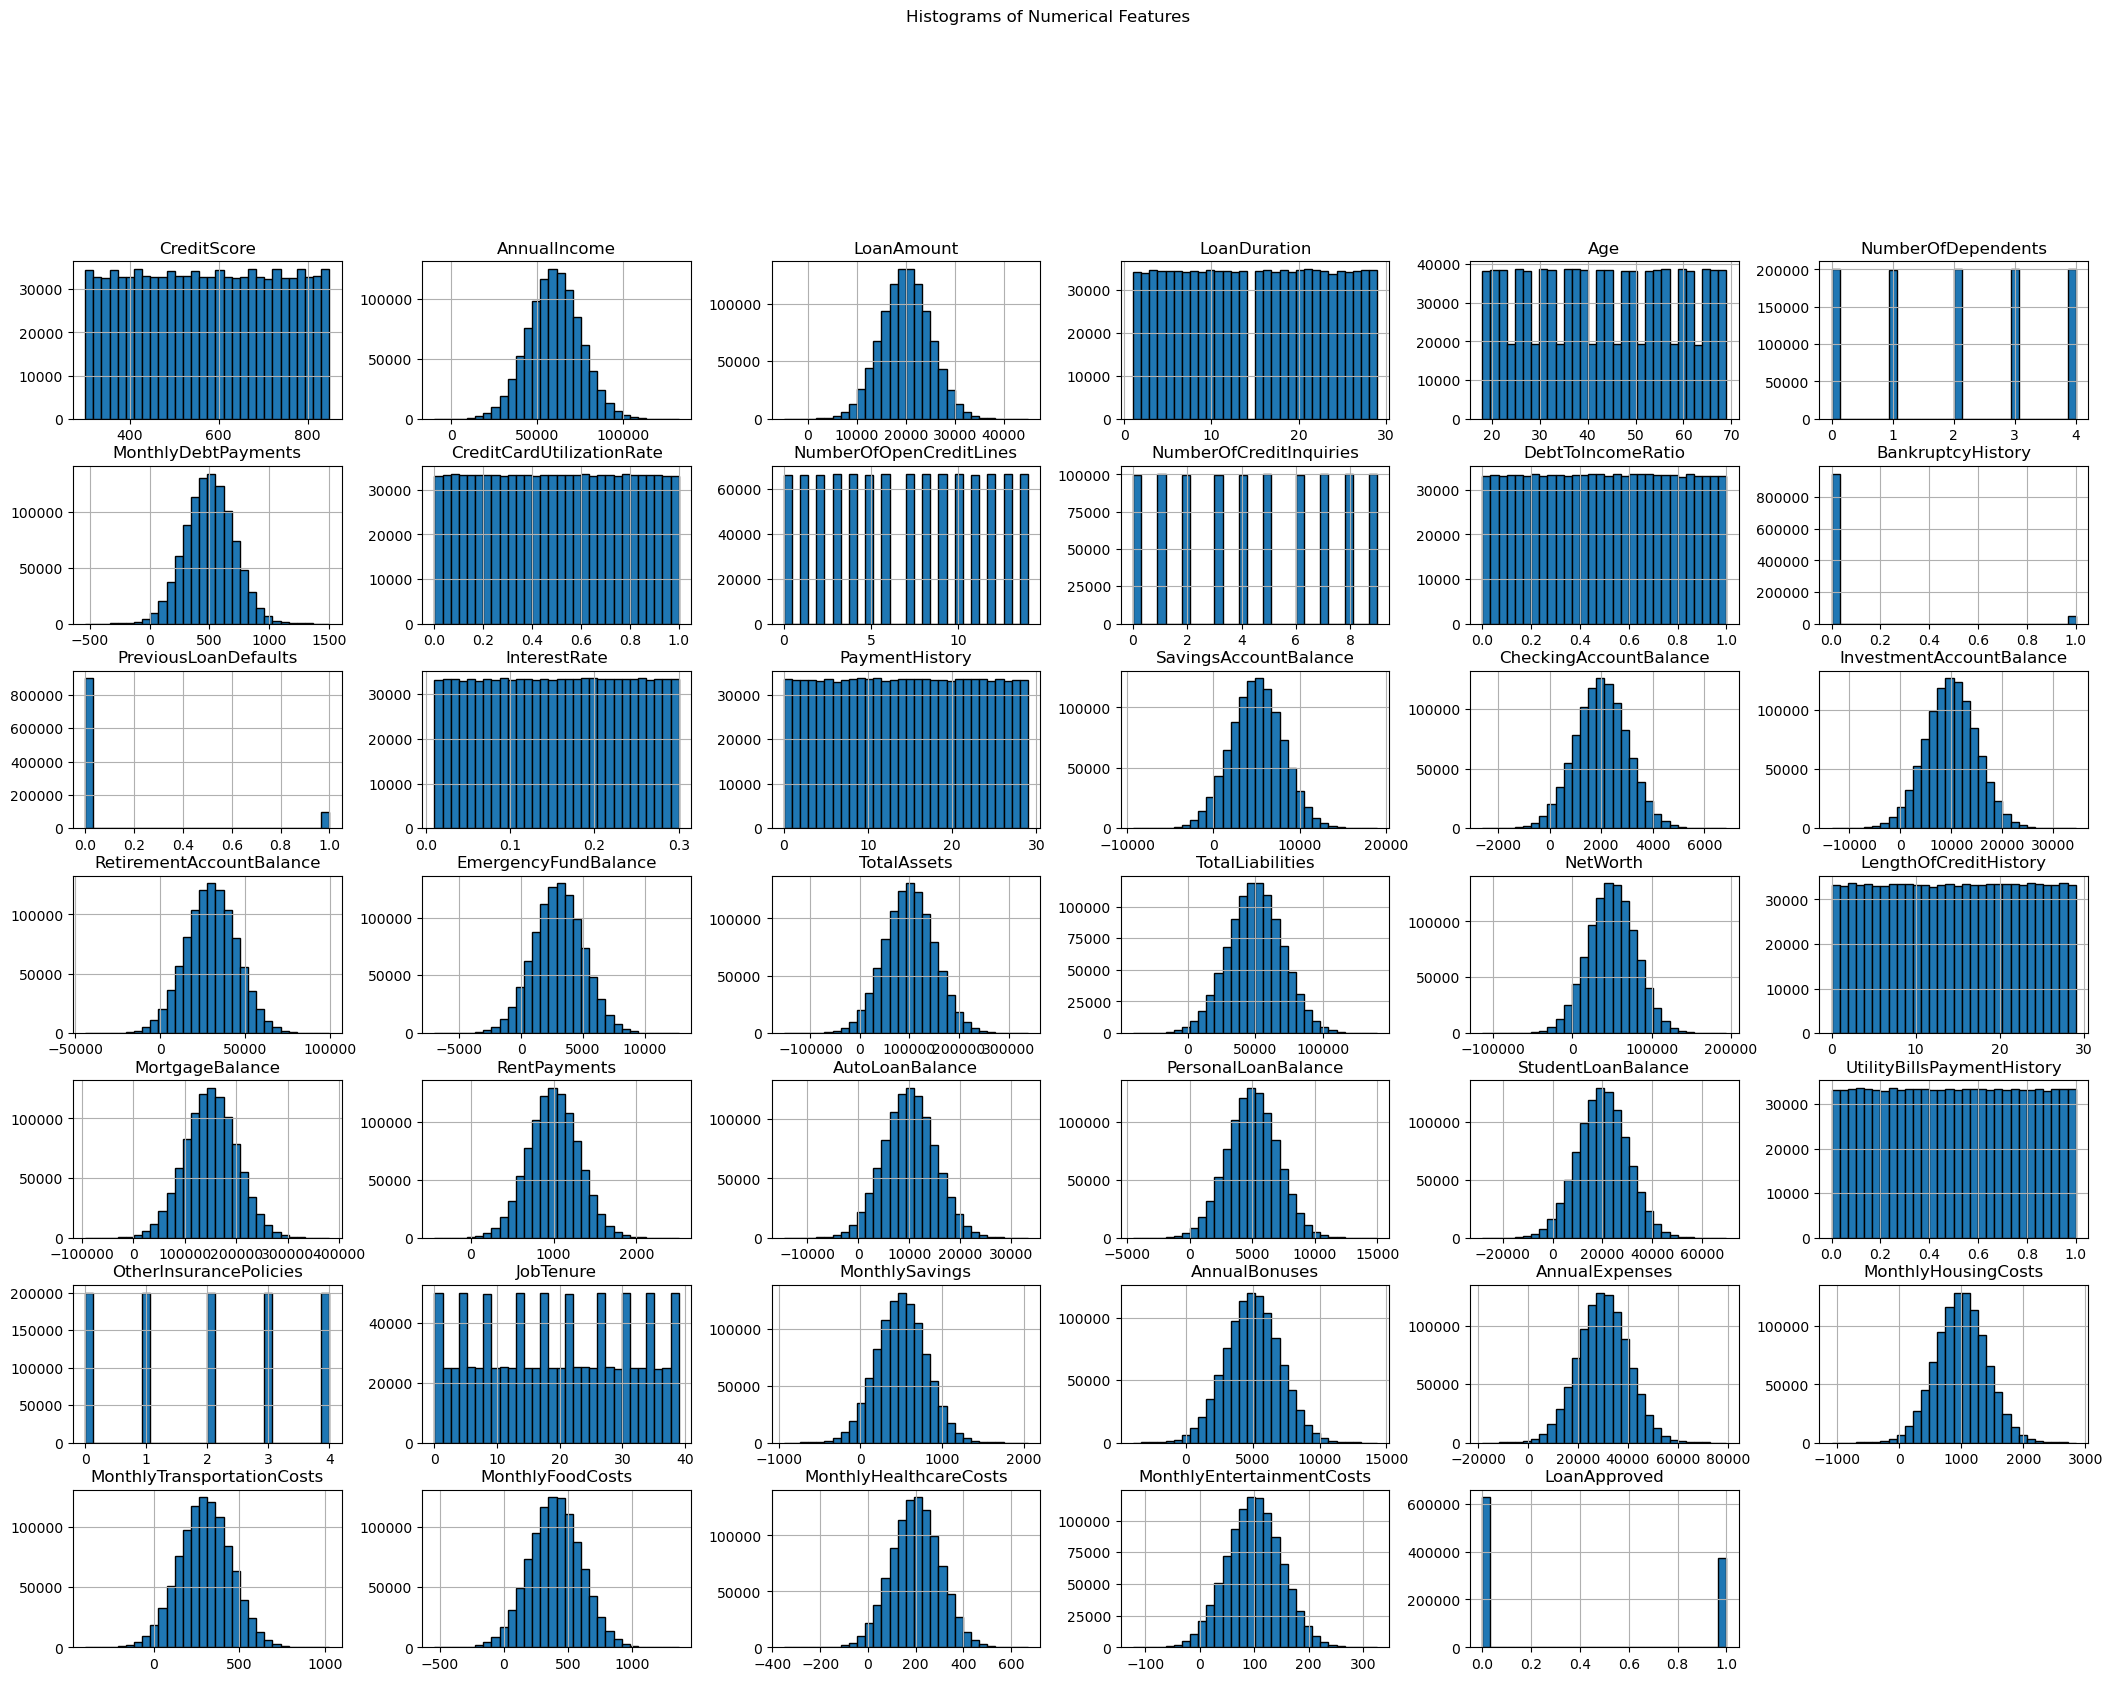

In [9]:
def plot_histograms(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    numeric_data.hist(figsize=(26, 18), bins=30, edgecolor='black')
    plt.suptitle('Histograms of Numerical Features', y=1.02)
    plt.show()

plot_histograms(data)

## Boxplots for Numerical Variables

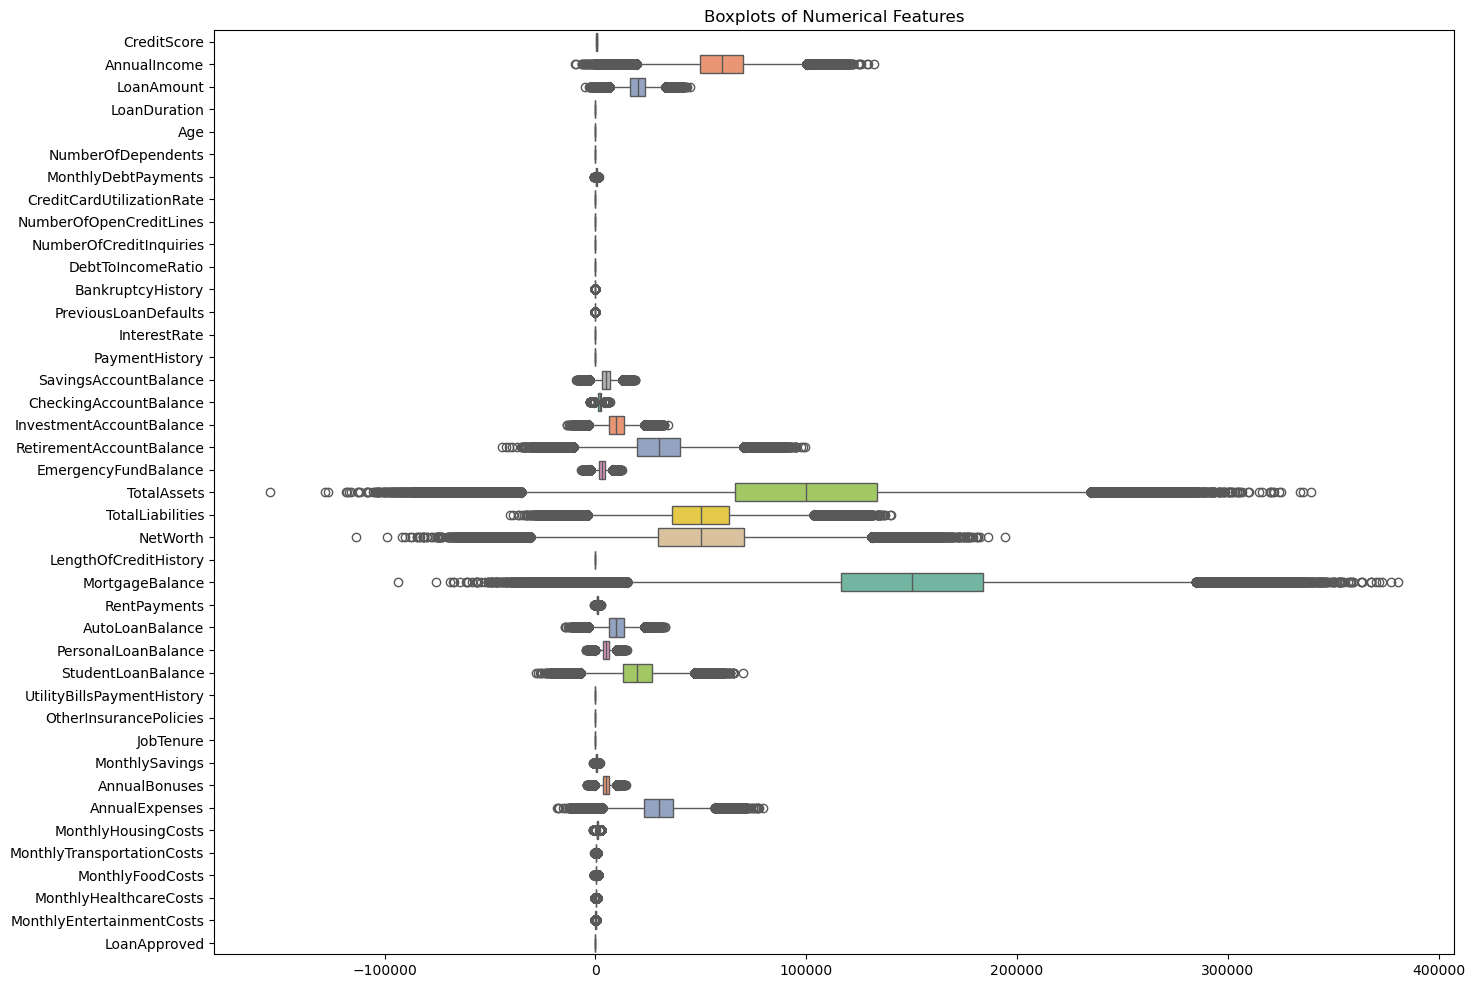

In [10]:
def plot_boxplots(data):
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(16, 12))
    sns.boxplot(data=numeric_data, orient="h", palette="Set2")
    plt.title('Boxplots of Numerical Features')
    plt.show()

plot_boxplots(data)

## Count Plots for Categorical Variables

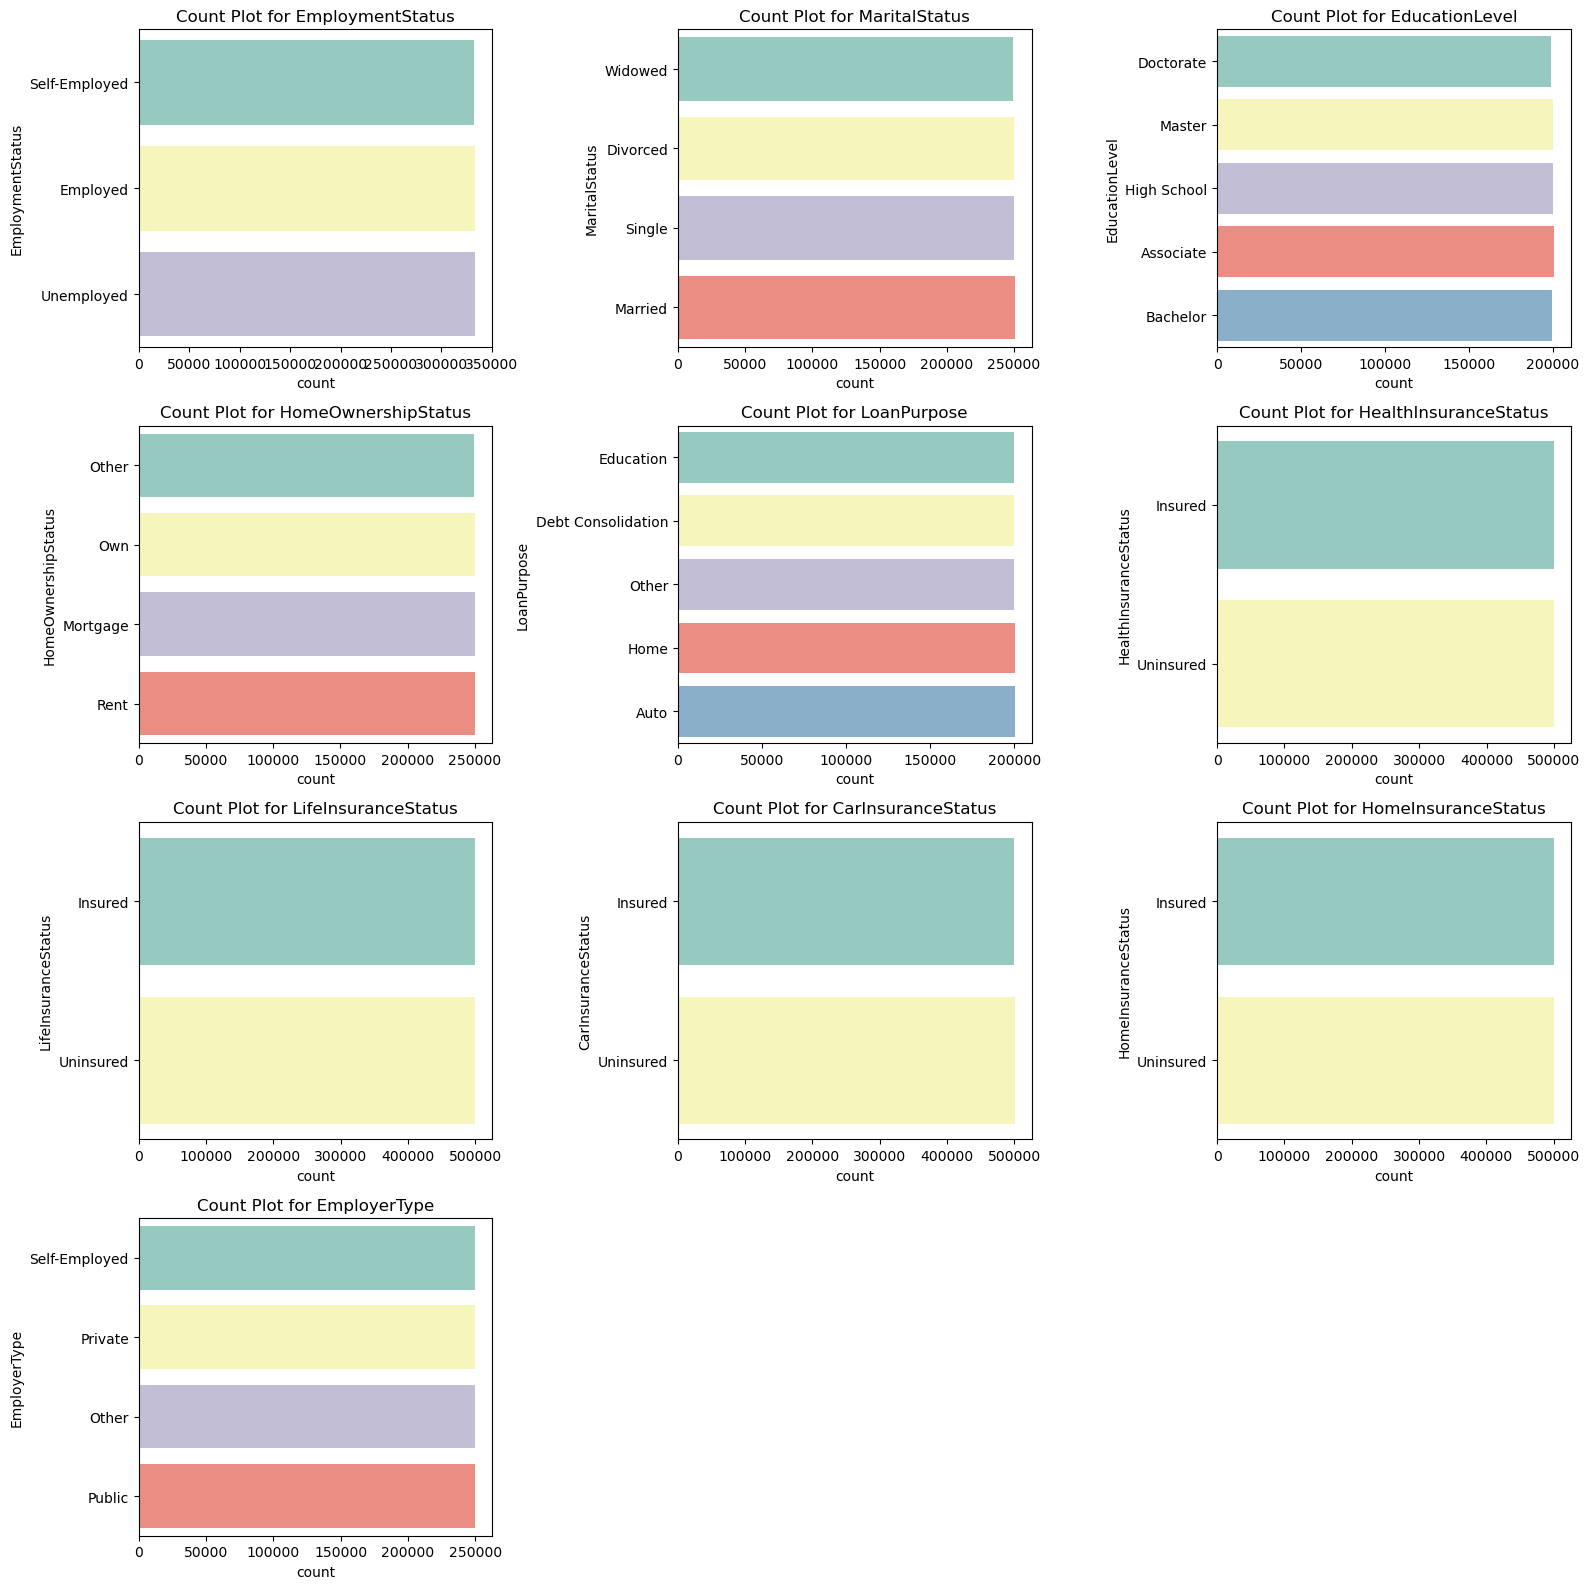

In [11]:
def plot_countplots(data):
    # Select only categorical columns
    categorical_data = data.select_dtypes(include=['object', 'category'])
    
    # Calculate the number of rows and columns needed
    num_plots = len(categorical_data.columns)
    rows = (num_plots // 3) + (num_plots % 3 > 0)
    
    plt.figure(figsize=(16, rows * 4))  # Adjust figure height based on number of rows
    
    for i, column in enumerate(categorical_data.columns, 1):
        plt.subplot(rows, 3, i)
        sns.countplot(y=column, data=categorical_data, palette="Set3", hue=column, dodge=False, legend=False)
        plt.title(f'Count Plot for {column}')
    
    plt.tight_layout()
    plt.show()

plot_countplots(data)

##  Scatter Plot for Key Relationships

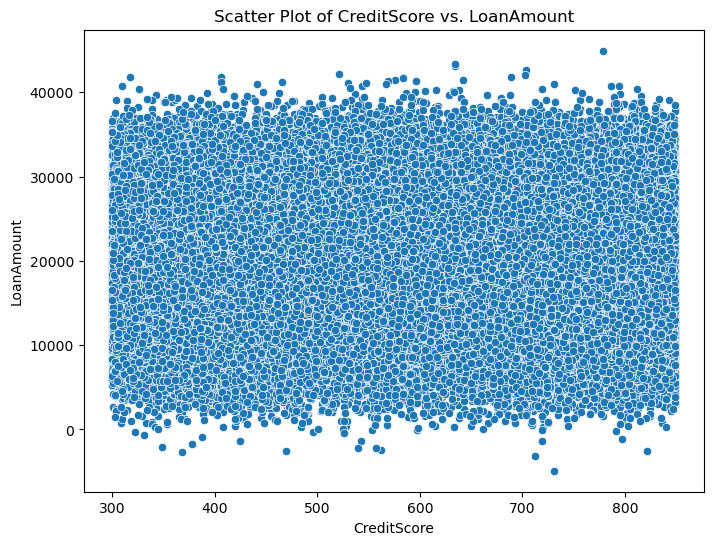

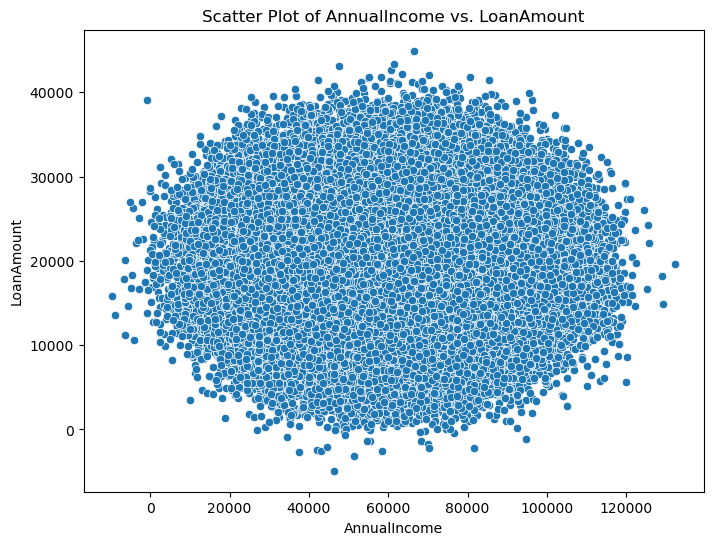

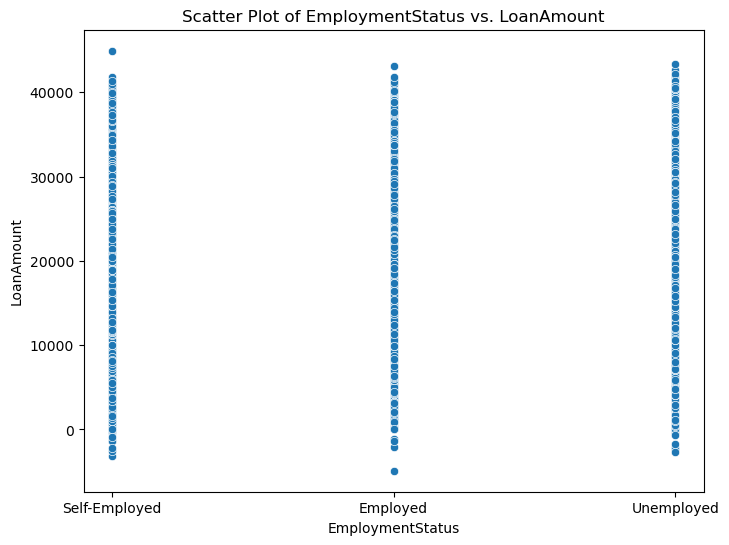

In [15]:
def plot_scatter(data, x_var, y_var):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_var, y=y_var, data=data)
    plt.title(f'Scatter Plot of {x_var} vs. {y_var}')
    plt.show()

plot_scatter(data, 'CreditScore', 'LoanAmount')
plot_scatter(data, 'AnnualIncome', 'LoanAmount')
plot_scatter(data, 'EmploymentStatus', 'LoanAmount')

## Correlation Matrix for All Features

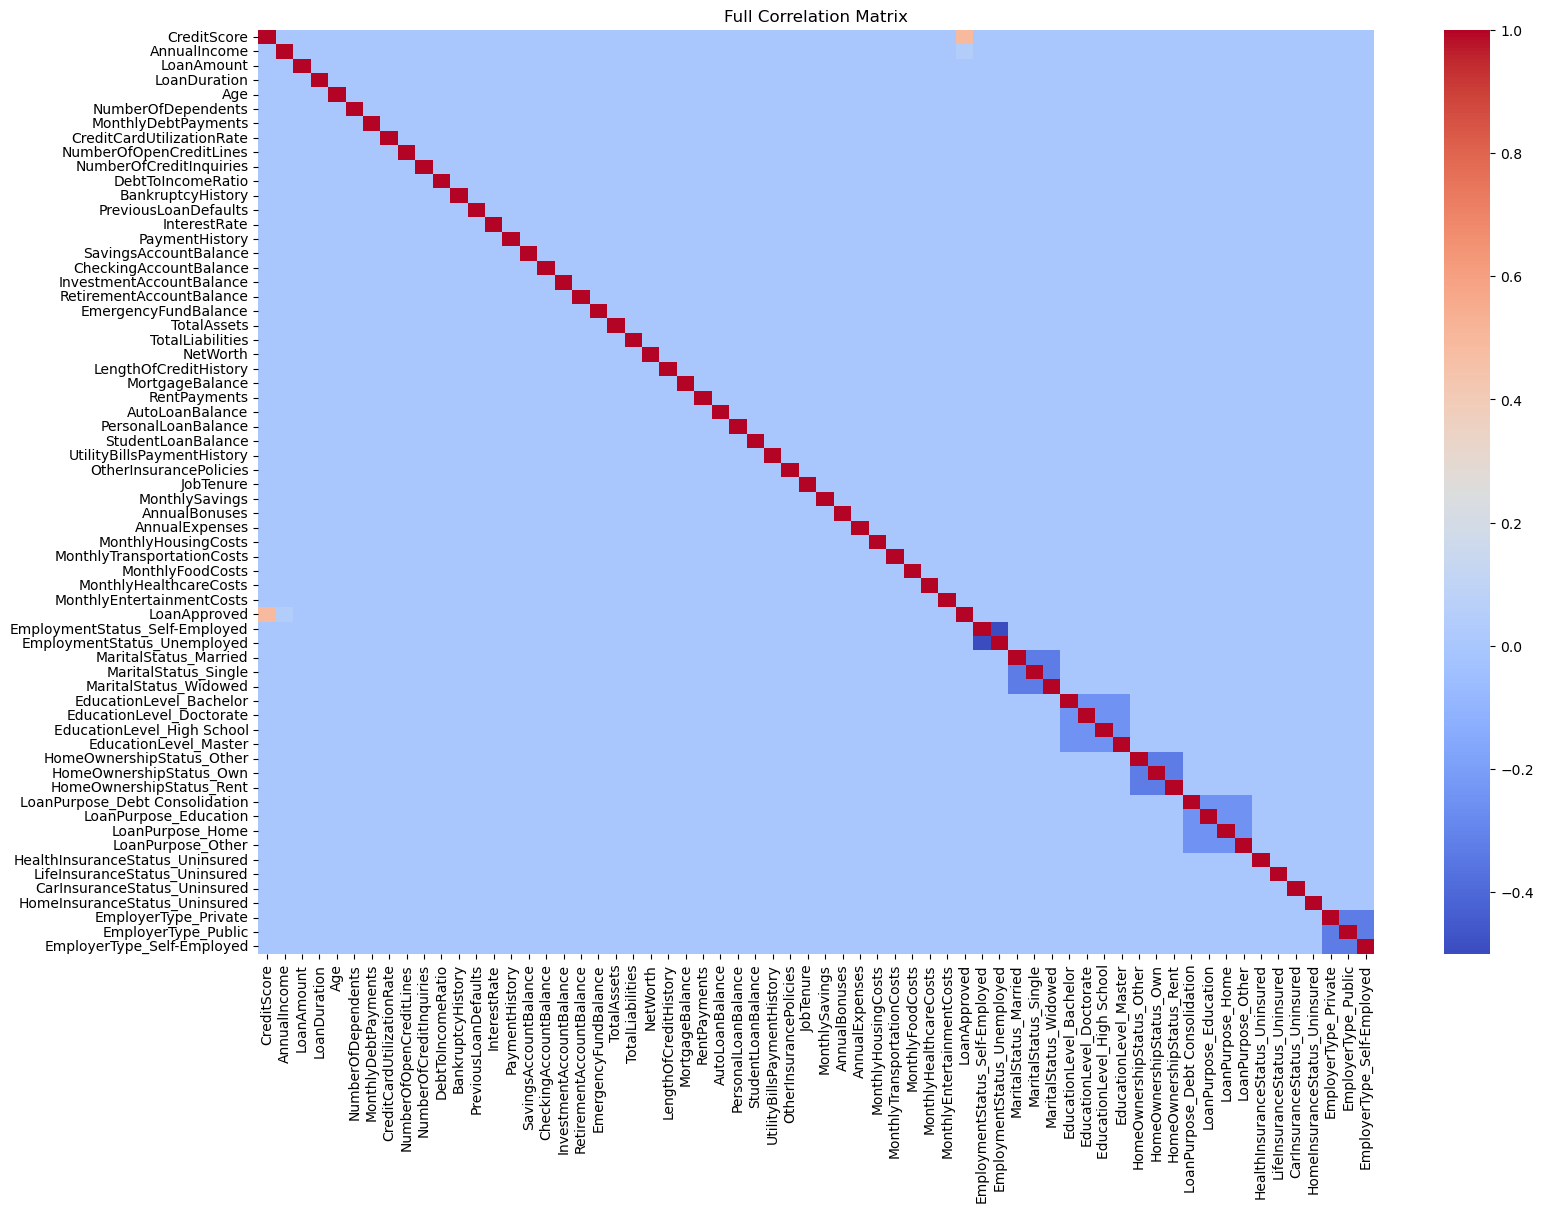

In [17]:
def plot_full_correlation_matrix(data):
    # Encode categorical variables before computing correlations
    encoded_data = pd.get_dummies(data, drop_first=True)
    corr_matrix = encoded_data.corr()
    plt.figure(figsize=(18, 12))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Full Correlation Matrix')
    plt.show()

plot_full_correlation_matrix(data)

# Feature Engineering

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature Engineering
def create_feature_engineering(data):
    # Example feature engineering
    data['TotalDebt'] = data['MortgageBalance'] + data['AutoLoanBalance'] + data['PersonalLoanBalance'] + data['StudentLoanBalance']
    data['SavingsToDebtRatio'] = np.where(data['TotalDebt'] == 0, 0, data['SavingsAccountBalance'] / data['TotalDebt'])
    data['MonthlyIncomeToDebtRatio'] = np.where(data['MonthlyDebtPayments'] == 0, 0, data['AnnualIncome'] / (12 * data['MonthlyDebtPayments']))
    return data

# Apply feature engineering
data = create_feature_engineering(data)

# Data Preprocessing

In [21]:
# Data Cleaning
data = data.dropna()  # Drop rows with missing values
data = data.drop_duplicates()  # Remove duplicate rows

# Data Processing
# Define numerical and categorical features
numerical_features = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age', 
                       'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
                       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 
                       'InterestRate', 'SavingsAccountBalance', 'CheckingAccountBalance', 
                       'InvestmentAccountBalance', 'RetirementAccountBalance', 
                       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth', 
                       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments', 
                       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance', 
                       'UtilityBillsPaymentHistory', 'MonthlySavings', 'AnnualBonuses', 
                       'AnnualExpenses', 'MonthlyHousingCosts', 'MonthlyTransportationCosts', 
                       'MonthlyFoodCosts', 'MonthlyHealthcareCosts', 'MonthlyEntertainmentCosts', 
                       'TotalDebt', 'SavingsToDebtRatio', 'MonthlyIncomeToDebtRatio']

categorical_features = ['EmploymentStatus', 'MaritalStatus', 'EducationLevel', 
                        'HomeOwnershipStatus', 'LoanPurpose', 'HealthInsuranceStatus', 
                        'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 
                        'OtherInsurancePolicies', 'EmployerType']

# Define preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Separate features and target variable
X = data.drop('LoanApproved', axis=1)  # Features
y = data['LoanApproved']  # Target variable

# Apply preprocessing to the newly engineered features
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model Training

## Dense Neural Network

In [ ]:
# pip install tensorflow

In [23]:
# Verify installation
import tensorflow as tf
print(tf.__version__)

2.17.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


C:\Users\SOL-62\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.7293 - loss: 0.4574 - val_accuracy: 0.7463 - val_loss: 0.4284
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7472 - loss: 0.4279 - val_accuracy: 0.7473 - val_loss: 0.4270
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.7485 - loss: 0.4259 - val_accuracy: 0.7476 - val_loss: 0.4254
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7481 - loss: 0.4262 - val_accuracy: 0.7474 - val_loss: 0.4263
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.7491 - loss: 0.4249 - val_accuracy: 0.7466 - val_loss: 0.4284
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7500 - loss: 0.4244 - val_accuracy: 0.7479 - val_loss: 0.4252
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.7492 - loss: 0.4238 - val_accuracy: 0.7472 - val_loss: 0.4254
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 

# Model Evaluation

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Accuracy: 0.7481

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75    125418
           1       0.60      0.98      0.74     74582

    accuracy                           0.75    200000
   macro avg       0.79      0.80      0.75    200000
weighted avg       0.84      0.75      0.75    200000



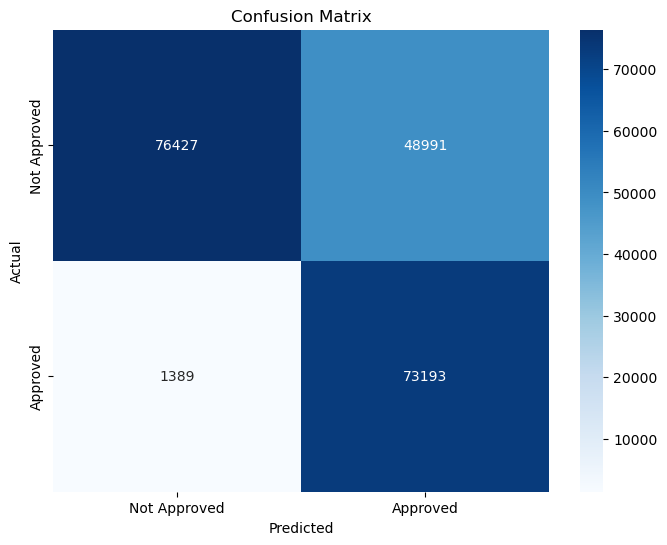

In [27]:
# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary outcome

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()